In [2]:
## author: karlkwon, mrthinks@gmail.com
## data: 2024.12.13
## to understand ArUco matrix...

In [3]:
import numpy as np
from numpy.linalg import inv
import math

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [5]:
%matplotlib inline

회전 행렬
\begin{equation}
   \begin{bmatrix} 
   cos(\theta) & sin(\theta) & 0  \\
   -sin(\theta) & cos(\theta) & 0  \\
   0 & 0 & 1  \\
   \end{bmatrix} 
   \begin{bmatrix} 
   x  \\
   y  \\
   1  \\
   \end{bmatrix} 
   =
   \begin{bmatrix} 
   x^{'}  \\
   y^{'}  \\
   1  \\
   \end{bmatrix}    
\end{equation}

이동 행렬
\begin{equation}
   \begin{bmatrix} 
   1 & 0 & x_1  \\
   0 & 1 & y_1  \\
   0 & 0 & 1  \\
   \end{bmatrix} 
   \begin{bmatrix} 
   x  \\
   y  \\
   1  \\
   \end{bmatrix} 
   =
   \begin{bmatrix} 
   x + x_1  \\
   y + y_1 \\
   1  \\
   \end{bmatrix} 
\end{equation}

변환 행렬
\begin{equation}
   \begin{bmatrix} 
   cos(\theta) & sin(\theta) & x_1  \\
   -sin(\theta) & cos(\theta) & y_1  \\
   0 & 0 & 1  \\
   \end{bmatrix} 
   \begin{bmatrix} 
   x  \\
   y  \\
   1  \\
   \end{bmatrix} 
   =
   \begin{bmatrix} 
   x^{'} + x_1  \\
   y^{'} + y_1 \\
   1  \\
   \end{bmatrix}   
\end{equation}

AuRco 반환 행렬
\begin{equation}
   \begin{bmatrix} 
    cv2.Rodrigues(rvec) & tvec \\
    0...0 & 1 \\
   \end{bmatrix}   
\end{equation}


In [6]:
theta = 30 / 180 * math.pi

In [7]:
x_t = 2
y_t = 1

In [8]:
m1 = np.array([[math.cos(theta), -math.sin(theta), x_t] , [math.sin(theta), math.cos(theta), y_t], [0, 0, 1]])

In [9]:
# 원점, unit-x, unit-y
p1s = np.array([[0, 0, 1], [1, 0, 1], [0, 1, 1]])

In [10]:
m1, p1s

(array([[ 0.8660254, -0.5      ,  2.       ],
        [ 0.5      ,  0.8660254,  1.       ],
        [ 0.       ,  0.       ,  1.       ]]),
 array([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 1]]))

In [13]:
m1[0:2, 0:2]

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [14]:
np.dot(m1[0:2, 0:2], m1[0:2, 0:2].T)

array([[1., 0.],
       [0., 1.]])

In [9]:
p2s_T = np.dot(m1, p1s.T)
p2s = p2s_T.T

In [10]:
p2s

array([[2.       , 1.       , 1.       ],
       [2.8660254, 1.5      , 1.       ],
       [1.5      , 1.8660254, 1.       ]])

In [11]:
p1s[1, 0] - p1s[0, 0]

1

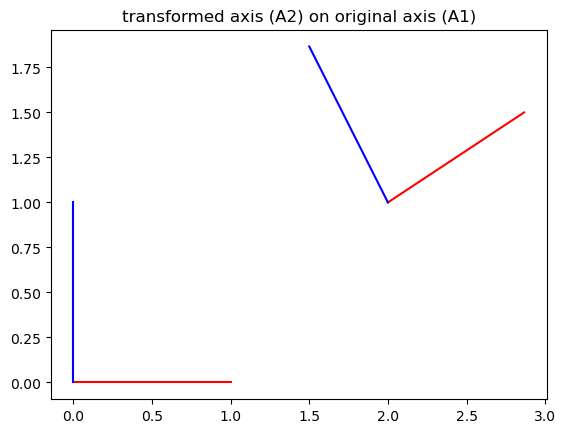

In [23]:
plt.title("transformed axis (A2) on original axis (A1)")

# A1
plt.plot([p1s[0, 0], p1s[1, 0]], [p1s[0, 1], p1s[1, 1]], c='r')
plt.plot([p1s[0, 0], p1s[2, 0]], [p1s[0, 1], p1s[2, 1]], c='b')
# A2
plt.plot([p2s[0, 0], p2s[1, 0]], [p2s[0, 1], p2s[1, 1]], c='r')
plt.plot([p2s[0, 0], p2s[2, 0]], [p2s[0, 1], p2s[2, 1]], c='b')

plt.show()

관측점 P3가 (3, 2)위치한다고 할 경우 A2 좌표계 상에 어느 위치에 있는가?

${P3_{A1}}$은 A1 좌표계에서 관측된 P3, ${P3_{A2}}$은 A2 좌표계에서 관측된 P3라 하자.</br>
A1 좌표계에 변환행렬 ${M_1}$을 적용하면 A2 좌표계가 된다.</br>

이는 다시 말하면, A1 좌표계에서 관측된 위치 ${P3_{A1}}$은 ${P3_{A2}}$에 ${M_1}$을 적용한 것이라고 볼수 있다.</br>

${P3_{A1}}$ = ${M_1}$ x ${P3_{A2}}$ </br>

${P3_{A2}}$ = ${M_1^{-1}}$ x ${P3_{A1}}$ </br>

In [13]:
p3_a1_T = np.array([[3, 2, 1]])
p3_a1 = p3_a1_T.T

In [14]:
p3_a2_T = np.dot(inv(m1), p3_a1)
p3_a2 = p3_a2_T

In [15]:
p3_a2

array([[1.3660254],
       [0.3660254],
       [1.       ]])

In [16]:
# 얻어진 좌표가 맞는 것인지 변환 행렬을 다시 적용하여 검증해 보자.
p3_a1_re_T = np.dot(m1, p3_a2)
p3_a1_re = p3_a1_re_T.T

In [17]:
p3_a1_re

array([[3., 2., 1.]])

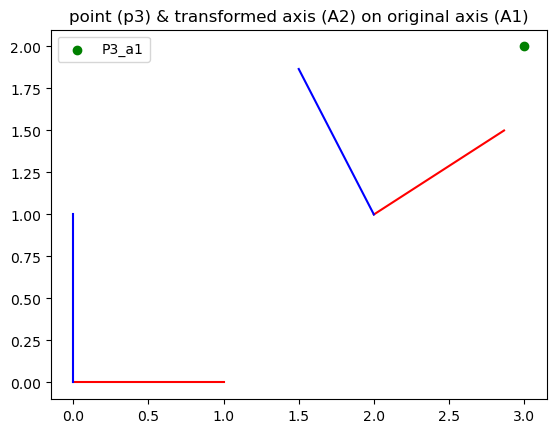

In [22]:
plt.title("point (p3) & transformed axis (A2) on original axis (A1)")

# A1
plt.plot([p1s[0, 0], p1s[1, 0]], [p1s[0, 1], p1s[1, 1]], c='r')
plt.plot([p1s[0, 0], p1s[2, 0]], [p1s[0, 1], p1s[2, 1]], c='b')
plt.scatter(p3_a1[0, 0], p3_a1[1, 0], c='g', label='P3_a1')
# A2
plt.plot([p2s[0, 0], p2s[1, 0]], [p2s[0, 1], p2s[1, 1]], c='r')
plt.plot([p2s[0, 0], p2s[2, 0]], [p2s[0, 1], p2s[2, 1]], c='b')
# plt.scatter(p3_a2[0, 0], p3_a2[1, 0], c='m', label='P3_a2')

plt.legend()
plt.show()

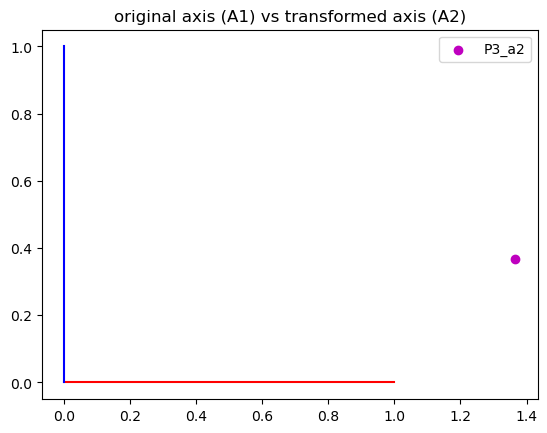

In [20]:
plt.title("point (p3) original axis (A2)")

# A1
plt.plot([p1s[0, 0], p1s[1, 0]], [p1s[0, 1], p1s[1, 1]], c='r')
plt.plot([p1s[0, 0], p1s[2, 0]], [p1s[0, 1], p1s[2, 1]], c='b')
# plt.scatter(p3_a1[0, 0], p3_a1[1, 0], c='g', label='P3_a1')
# A2
# plt.plot([p2s[0, 0], p2s[1, 0]], [p2s[0, 1], p2s[1, 1]], c='r')
# plt.plot([p2s[0, 0], p2s[2, 0]], [p2s[0, 1], p2s[2, 1]], c='b')
plt.scatter(p3_a2[0, 0], p3_a2[1, 0], c='m', label='P3_a2')

plt.legend()
plt.show()